# FTR Exercise

## Part 1: Sources with memory

First, import libraries and load Hamlet from file.

In [1]:
f = open('data/hamlet.txt', 'r')
hamlet = f.read()
f.close()
print(hamlet[:294])

        HAMLET


        DRAMATIS PERSONAE


CLAUDIUS        king of Denmark. (KING CLAUDIUS:)

HAMLET  son to the late, and nephew to the present king.

POLONIUS        lord chamberlain. (LORD POLONIUS:)

HORATIO friend to Hamlet.

LAERTES son to Polonius.

LUCIANUS        nephew to the king.


In [4]:
from math import log2
H = lambda pr: -sum([pr[a]*log2(pr[a]) for a in pr])

In [5]:
# Me
from itertools import groupby
frequencies = dict(
    [(key, len(list(group))) for key, group in groupby(sorted(hamlet))])
Nin = sum([frequencies[a] for a in frequencies])
p = dict([(a,frequencies[a]/Nin) for a in frequencies])
print(f'File length: {Nin}')

File length: 207039


In [9]:
print(H(p))

4.449863631694343


In [10]:
print(len(hamlet))

207039


In [6]:
h = []
for n in range(1,40):
    p = {}  # Me, A dict of frequencies of all the length-n substrings of the source sequence (Hamlet)
    for k in range(len(hamlet)-n):
        key = hamlet[k:(k+n)]
        if key in p:
            p[key] += 1
        else:
            p[key] = 1
    totfreq = sum(list(p.values()))  # This always equals the length of the source sequence (Hamlet)
    for a in p:
        p[a] /= totfreq  # Me, Convert frequencies into dict of probablities of all length-n substrings
    # if n == 2:
    #     print(p)
    h.append(H(p)/n)  # Me, add entropy of given probabilities considering length-n substrings and divide by n

In [8]:
hstar = [(k+2)*h[k+1]-(k+1)*h[k] for k in range(len(h)-1)]

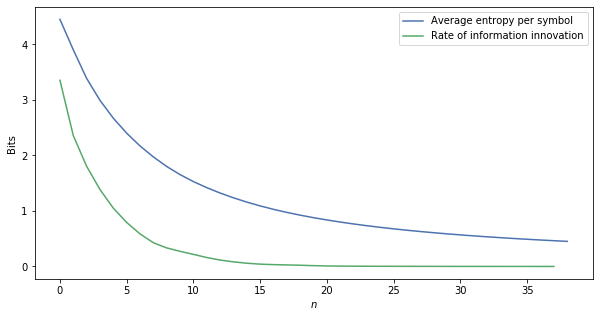

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.figure(figsize=(10, 5))
plt.plot(h, label='Average entropy per symbol')
plt.plot(hstar, label='Rate of information innovation')
plt.xlabel('$n$')
plt.ylabel('Bits')
plt.legend(loc=1)
#plt.grid()
plt.show()

## Part 2: Estimating probabilities

First estimate the whole file probabilities of Hamlet so as to get the entropy.

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

In [12]:
from itertools import groupby
f_tot = dict([(key, len(list(group))) for key, group in groupby(sorted(hamlet))])  # f_tot is a dict of the number of occurances (frequency) of every character in hamlet
Nin = sum([f_tot[a] for a in f_tot])  # Nin is number of bytes of the hamlet string
p_tot = dict([(a,f_tot[a]/Nin) for a in f_tot])  # Dict of probabilities of each character.

In [13]:
delta = 1
N = 10000 # length of measurement
# Me, f is a list of 256 ones
f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
Ltot = 0  # Me, total lenght L
Lav = []  # Me, average length L
for k in range(N):
    p = [x/sum(f) for x in f]  # Me, this updates the probability at each step
    # calculate length of codeword portion for next symbol
    Ltot += -log2(p[ord(hamlet[k])])
    # record an average length measurement
    Lav.append(Ltot/(k+1))
    # now update probability table
    f[ord(hamlet[k])] += 1  # Me, we update the frequency table by one for the given character (its unicode value)

In [14]:
# Me
print(H(p_tot))

4.449863631694343


In [15]:
H_const = [H(p_tot) for _ in range(N)]

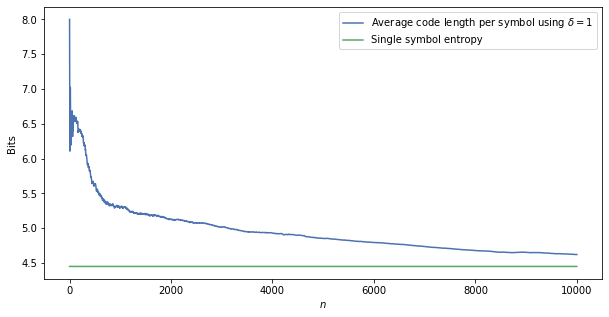

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(Lav, label=f'Average code length per symbol using $\delta={delta}$')
plt.plot(H_const, label='Single symbol entropy')
# plt.hlines(H(p_tot),0,N)
# plt.grid()
plt.xlabel('$n$')
plt.ylabel('Bits')
plt.legend(loc=1)
plt.show()

## Compare weak and strong primers

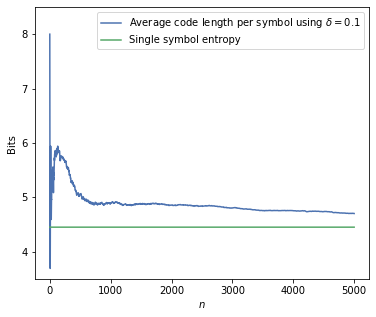

In [22]:
delta = 0.1
N = 5000 # length of measurement
# Me, f is a list of 256 ones
f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
Ltot = 0  # Me, total lenght L
Lav = []  # Me, average length L
for k in range(N):
    p = [x/sum(f) for x in f]  # Me, this updates the probability at each step
    # calculate length of codeword portion for next symbol
    Ltot += -log2(p[ord(hamlet[k])])
    # record an average length measurement
    Lav.append(Ltot/(k+1))
    # now update probability table
    f[ord(hamlet[k])] += 1  # Me, we update the frequency table by one for the given character (its unicode value)

H_const = [H(p_tot) for _ in range(N)]

plt.figure(figsize=(6, 5))
plt.plot(Lav, label=f'Average code length per symbol using $\delta={delta}$')
plt.plot(H_const, label='Single symbol entropy')
# plt.hlines(H(p_tot),0,N)
# plt.grid()
plt.xlabel('$n$')
plt.ylabel('Bits')
plt.ylim(3.5, 8.5)
plt.legend(loc=1)
plt.show()

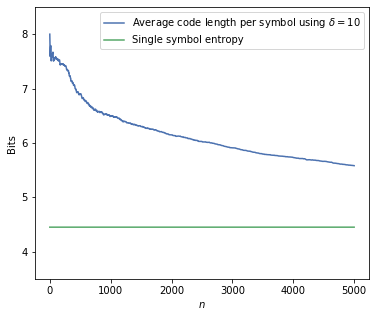

In [23]:
delta = 10
N = 5000 # length of measurement
# Me, f is a list of 256 ones
f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
Ltot = 0  # Me, total lenght L
Lav = []  # Me, average length L
for k in range(N):
    p = [x/sum(f) for x in f]  # Me, this updates the probability at each step
    # calculate length of codeword portion for next symbol
    Ltot += -log2(p[ord(hamlet[k])])
    # record an average length measurement
    Lav.append(Ltot/(k+1))
    # now update probability table
    f[ord(hamlet[k])] += 1  # Me, we update the frequency table by one for the given character (its unicode value)

H_const = [H(p_tot) for _ in range(N)]

plt.figure(figsize=(6, 5))
plt.plot(Lav, label=f'Average code length per symbol using $\delta={delta}$')
plt.plot(H_const, label='Single symbol entropy')
plt.xlabel('$n$')
plt.ylabel('Bits')
plt.ylim(3.5, 8.5)
plt.legend(loc=1)
plt.show()

In [26]:
hamlet[:60]
beginning = hamlet[:60].replace(' ', '-').replace('\n', '/')
markers = [f'${char}$' for char in beginning]

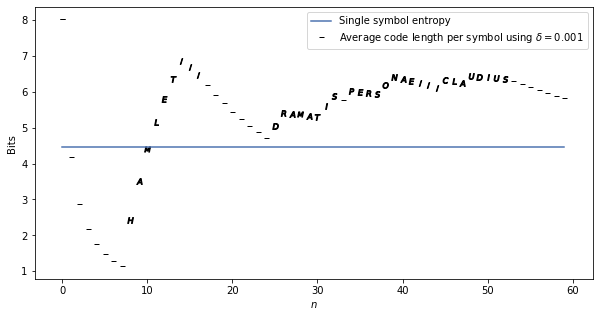

In [42]:

x = [i for i in range(N)]
y = [2,1,3,6,7]

cluster = ['$/$','^','^','s','s']
#plt.figure(figsize=(10, 3.5))

fig, ax = plt.subplots()
fig.set_size_inches((10, 5))
plt.plot(H_const, label='Single symbol entropy')
ax.scatter([x[0]], [Lav[0]], color='black', marker=markers[0], label=f'Average code length per symbol using $\delta={delta}$')
for xp, yp, m in zip(x, Lav, markers):
    ax.scatter([xp],[yp], color='black', marker=m)


plt.xlabel('$n$')
plt.ylabel('Bits')
#plt.ylim(3.5, 8.5)
plt.legend(loc=1)

plt.show()

# Search for best delta for Hamlet

## Visualise different values to see a good range to test

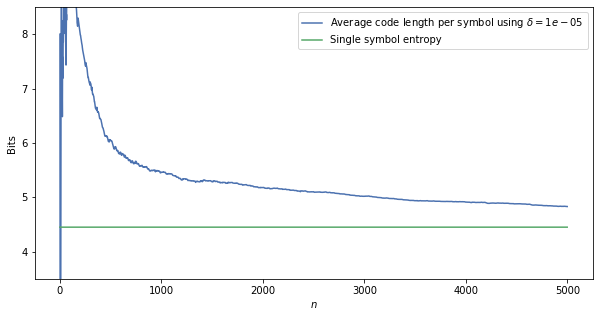

4.880325104776086
4.449863631694343
9.673587972803542


In [45]:
delta = 0.00001
N = 5000 # length of measurement
# Me, f is a list of 256 ones
f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
Ltot = 0  # Me, total lenght L
Lav = []  # Me, average length L
for k in range(N):
    p = [x/sum(f) for x in f]  # Me, this updates the probability at each step
    # calculate length of codeword portion for next symbol
    Ltot += -log2(p[ord(hamlet[k])])
    # record an average length measurement
    Lav.append(Ltot/(k+1))
    # now update probability table
    f[ord(hamlet[k])] += 1  # Me, we update the frequency table by one for the given character (its unicode value)

H_const = [H(p_tot) for _ in range(N)]

plt.figure(figsize=(10, 5))
plt.plot(Lav, label=f'Average code length per symbol using $\delta={delta}$')
plt.plot(H_const, label='Single symbol entropy')
plt.xlabel('$n$')
plt.ylabel('Bits')
plt.ylim(3.5, 8.5)
plt.legend(loc=1)
plt.show()
print(Lav[4500])
print(H_const[0])
print(100*(Lav[4500]-H_const[0])/H_const[0])

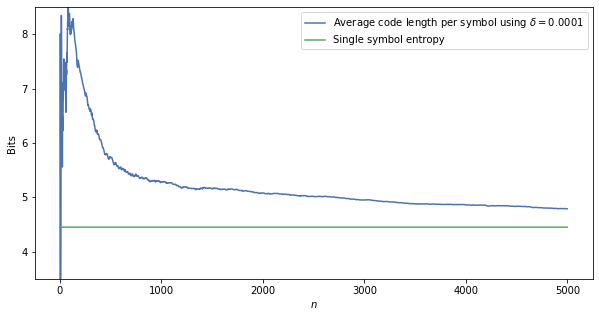

4.833887671064417
4.449863631694343
8.630018156845233


In [46]:
delta = 0.0001
N = 5000 # length of measurement
# Me, f is a list of 256 ones
f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
Ltot = 0  # Me, total lenght L
Lav = []  # Me, average length L
for k in range(N):
    p = [x/sum(f) for x in f]  # Me, this updates the probability at each step
    # calculate length of codeword portion for next symbol
    Ltot += -log2(p[ord(hamlet[k])])
    # record an average length measurement
    Lav.append(Ltot/(k+1))
    # now update probability table
    f[ord(hamlet[k])] += 1  # Me, we update the frequency table by one for the given character (its unicode value)

H_const = [H(p_tot) for _ in range(N)]

plt.figure(figsize=(10, 5))
plt.plot(Lav, label=f'Average code length per symbol using $\delta={delta}$')
plt.plot(H_const, label='Single symbol entropy')
plt.xlabel('$n$')
plt.ylabel('Bits')
plt.ylim(3.5, 8.5)
plt.legend(loc=1)
plt.show()
print(Lav[4500])
print(H_const[0])
print(100*(Lav[4500]-H_const[0])/H_const[0])

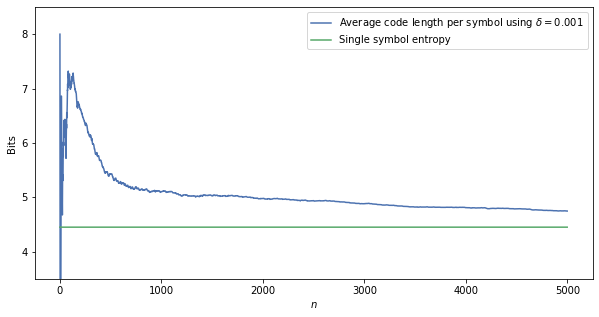

4.787969721978762
4.449863631694343
7.598122510457262


In [47]:
delta = 0.001
N = 5000 # length of measurement
# Me, f is a list of 256 ones
f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
Ltot = 0  # Me, total lenght L
Lav = []  # Me, average length L
for k in range(N):
    p = [x/sum(f) for x in f]  # Me, this updates the probability at each step
    # calculate length of codeword portion for next symbol
    Ltot += -log2(p[ord(hamlet[k])])
    # record an average length measurement
    Lav.append(Ltot/(k+1))
    # now update probability table
    f[ord(hamlet[k])] += 1  # Me, we update the frequency table by one for the given character (its unicode value)

H_const = [H(p_tot) for _ in range(N)]

plt.figure(figsize=(10, 5))
plt.plot(Lav, label=f'Average code length per symbol using $\delta={delta}$')
plt.plot(H_const, label='Single symbol entropy')
plt.xlabel('$n$')
plt.ylabel('Bits')
plt.ylim(3.5, 8.5)
plt.legend(loc=1)
plt.show()
print(Lav[4500])
print(H_const[0])
print(100*(Lav[4500]-H_const[0])/H_const[0])

## Test a range of values of delta

In [18]:
deltas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
lavs = list()
percs = list()
for delta in deltas:
    N = 5000 # length of measurement
    # Me, f is a list of 256 ones
    f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
    Ltot = 0  # Me, total lenght L
    Lav = []  # Me, average length L
    for k in range(N):
        p = [x/sum(f) for x in f]  # Me, this updates the probability at each step
        # calculate length of codeword portion for next symbol
        Ltot += -log2(p[ord(hamlet[k])])
        # record an average length measurement
        Lav.append(Ltot/(k+1))
        # now update probability table
        f[ord(hamlet[k])] += 1  # Me, we update the frequency table by one for the given 
    print(delta)
    print(Lav[-1])
    lavs.append(Lav[-1])
    print(H_const[0])
    perc_diff = 100*(Lav[-1]-H_const[0])/H_const[0]
    print(perc_diff)
    percs.append(perc_diff)
    print('\n\n')

0.0001
4.787554784396275
4.449863631694343
7.588797784649238



0.001
4.746224887354508
4.449863631694343
6.660007591003902



0.005
4.719129162528834
4.449863631694343
6.051096238469775



0.01
4.708993090209996
4.449863631694343
5.823312352090816



0.05
4.6960820295132635
4.449863631694343
5.5331672652892046



0.1
4.700527509466211
4.449863631694343
5.63306875263556



0.5
4.771451727458661
4.449863631694343
7.226920247033946



1
4.852172454253878
4.449863631694343
9.040924753155895



5
5.269892462472521
4.449863631694343
18.428178898281022



10
5.580676159289918
4.449863631694343
25.41229622277219



50
6.514332427405304
4.449863631694343
46.393978930201236



100
6.909699779323137
4.449863631694343
55.27891079871543





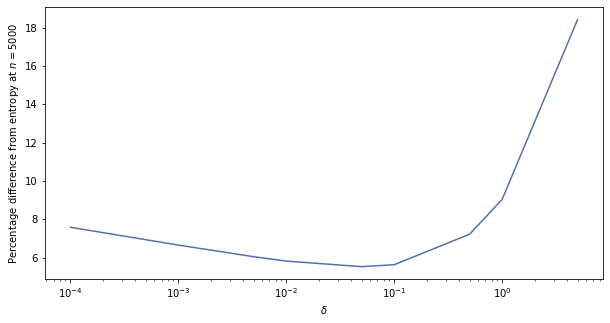

In [31]:
plt.figure(figsize=(10, 5))
plt.loglog(deltas[:-3], percs[:-3])
plt.yscale('linear')
plt.xlabel('$\delta$')
plt.ylabel('Percentage difference from entropy at $n=5000$')
plt.show()